In [51]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Context

In [36]:
my_filepath = 'train.csv'
my_data = pd.read_csv(my_filepath, index_col='PassengerId')
my_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Data quality assessment

In [37]:
cutted = my_data.drop(columns=['Ticket', 'Cabin', 'Name']) #бесполезные данные для анализа
cutted

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S
...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,C
99996,0,2,male,66.00,0,0,11.15,S
99997,0,3,male,37.00,0,0,9.95,S


In [38]:
def fill_nan(df):
    
    df_copy = df.copy()
    
    categorical_vars = list(df_copy.select_dtypes(include=['object']).columns.values)
    
    for col in categorical_vars:
        if (df_copy[col].isnull):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
            
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    
    for col in numerical_vars:
        if (df_copy[col].isnull):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)
            
    return df_copy

In [39]:
prepared_filled = fill_nan(cutted) # заполняем NaN ячейки средними значениями
prepared_final = prepared_filled.copy()

# распределяем людей по возрастным группам
prepared_final['AgeGroup'] = prepared_filled['Age'].map(lambda age: int(age // 10) + 1)

In [40]:

prepared_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
PassengerId,,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S,4
1,0,3,male,39.00,0,0,13.35,S,4
2,0,3,male,0.33,1,2,71.29,S,1
3,0,3,male,19.00,0,0,13.04,S,2
4,1,3,male,25.00,0,0,7.76,S,3
...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,C,7
99996,0,2,male,66.00,0,0,11.15,S,7
99997,0,3,male,37.00,0,0,9.95,S,4


# Data exploration

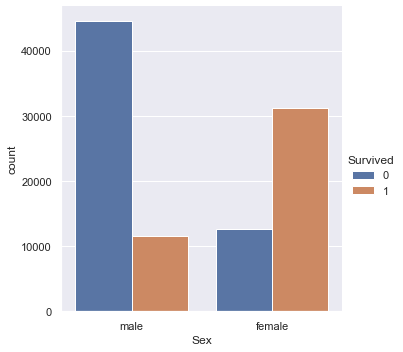

In [41]:
sns.catplot(x='Sex', data=prepared_final, hue='Survived', kind='count') # график выживаемости полов

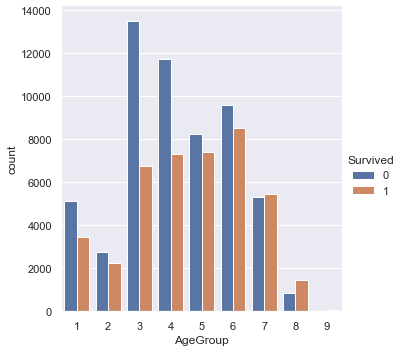

In [42]:
# график выживаемости по возрастным группам
sns.catplot(x='AgeGroup', data=prepared_final, hue='Survived', kind='count')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

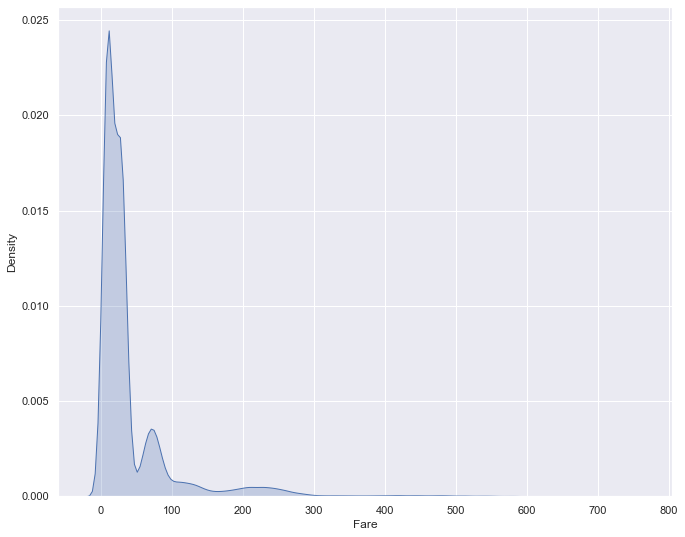

In [56]:
# Плотность стоимости билетов
plt.figure(figsize=(11, 9))
sns.kdeplot(data=prepared_final['Fare'], shade=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

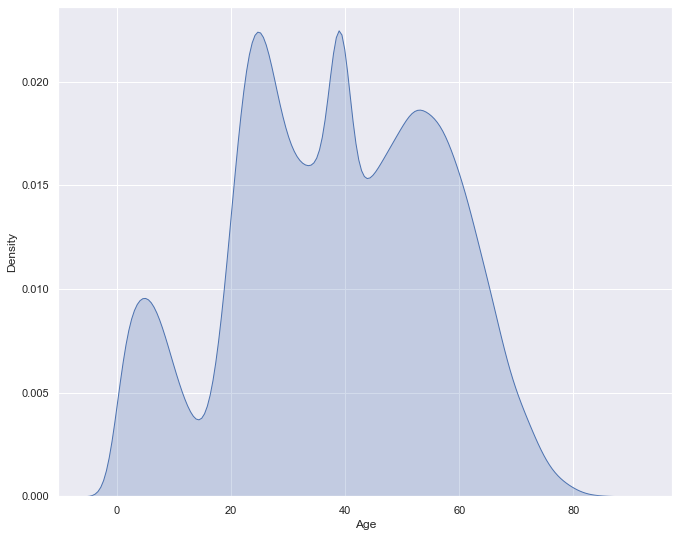

In [44]:
# График плотности возрастов пассажиров
plt.figure(figsize=(11, 9))
sns.kdeplot(data=prepared_final['Age'], shade=True)

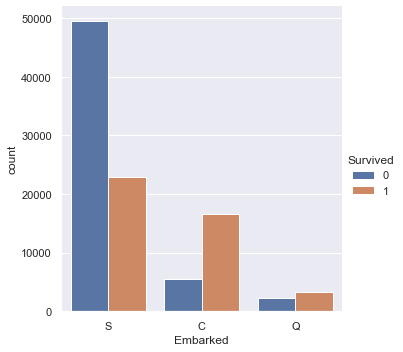

In [45]:
sns.catplot(x='Embarked', data=prepared_final, hue='Survived', kind='count') # самое "везучее" место посадки

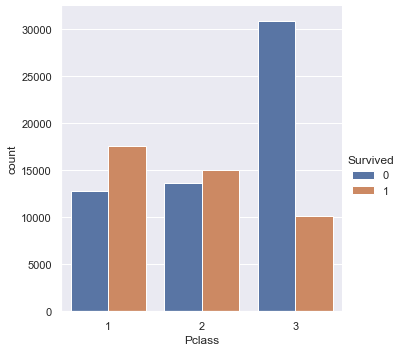

In [52]:
sns.catplot(x='Pclass', data=prepared_final, hue='Survived', kind='count') # зависимость класса билета и выживаемости

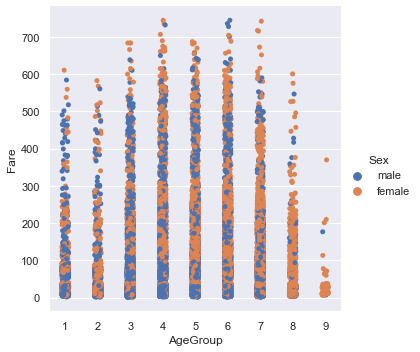

In [47]:
# По какой стоимости различные возрастные группы, разделенные по половому признаку, покупали билеты
sns.catplot(x='AgeGroup', y='Fare', data=prepared_final, hue='Sex')

<Figure size 792x720 with 0 Axes>

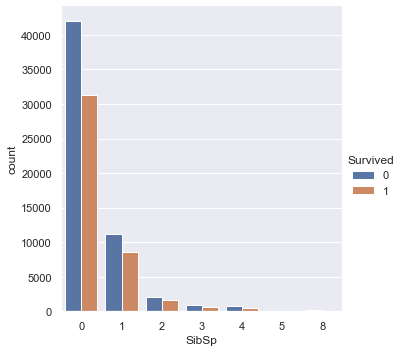

In [54]:
# выживаемость людей с супругами или братьями/сестрами на борту
plt.figure(figsize=(11, 10))
sns.catplot(x='SibSp', data=prepared_final, hue='Survived', kind='count')

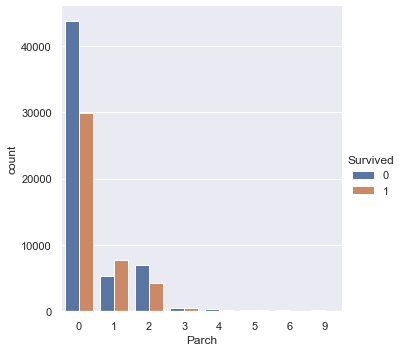

In [55]:
# выжимаемость людей с родителями или детьми на борту
sns.catplot(x='Parch', data=prepared_final, hue='Survived', kind='count')

# Summary

In [ ]:
'''
- Из выживших больше всего женщин
- По возрасту спасали в основном либо детей либо 40+ лет людей
- Почти все билеты были куплены стоимостью где-то до 60 денежных единиц
- Самое везучее место посадки - Cherbourg
- Чем выше класс билета, тем выше и шанс выживаемости
- Четкого разграничения покупок билетов и половой принаждлежности нет: покупали и дорогие и дешевые билеты как женщины,
так и мужчины
- Наличие супруга или брата/сестры не очень помогало выживаемости
- А вот с родителем или ребенком иногда выживаемость была выше, чем без них
'''